# The Physics of Sound & Digital Audio

In [1]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib widget
import ipytone
import ipywidgets
import numpy as np
from scipy.signal import square, sawtooth
from scipy.io import wavfile
import time
from IPython.display import display

# Part I : The Fundamentals of Sound

## What *is* sound, anyway?

This might feel like a silly question -- we experience sound all the time, and have an *intuitive* notion for what it is -- but the physics of sound are surprisingly subtle! We'll begin by taking a look at how sound is produced, how it propagates thrugh air, and -- most importantly -- how we can represent it *mathematically*.

Fundamentally, sound is just a disturbance of air molecules that propagates out from a source. Think of throwing a rock into a pond: the rock disturbs the surface of the water, and the waves ripple out from the spot the rock hit the water

![pond-ripple.jpg](media/pond-ripple.jpg)

In the case of sound waves, we can't *see* the medium that's doing the rippling (the air), but if we could it would look a lot like the surface of the pond.

![spherical_sound_highlighted.gif](media/spherical_sound_highlighted.gif)

In this picture, each dot represents an air molecule. They periodically move closer together and further apart as the sound wave passes by (the sound wave *is* this movement!). Techically speaking, the wave is composed of "compressions" (air molecules bunching together), and "rarefaections" (molecules moving further apart) relative to density of still air.

The way we "see" sound waves is, of course, with our ears! Everythig you hear -- thunderclaps, speech, and symphony orchestras -- arrives as pressure waves in the air that interact with your eardrums. Without all the air molecules that make up our atmosphere, we'd be completely unable to make sound! (Hence the rather ominous saying: "In space, no one can hear you scream")

## Turning sound into math

An important way to understand and analyze sound is as a *mathematical* object, which will be the main focus of this activity (don't worry - it's a very simple function!). The fundamental building block of any audio signal (songs, speeches, etc) is the **sine wave**, which you may have learned about in your trigonometry class:
$$f(x) = \sin(x)$$

The function $\sin(x)$ is a **periodic** function, which varies between $-1$ and $1$ as the argument varies between $0$ and $2\pi$. Here's an illustration, and an introduction to some of the coding tools we'll be using in this exercise: `numpy` and `matplotlib`

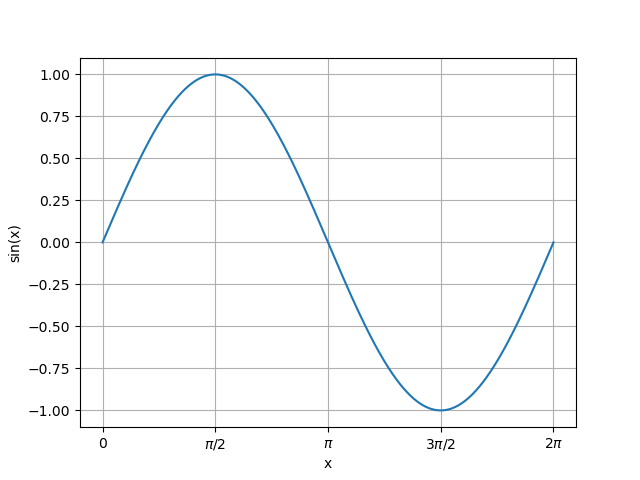

In [2]:
x = np.linspace(0,2*np.pi,1000) # generate 1000 equally spaced points between 0 and 2*pi
sinx = np.sin(x) # use numpy's built-in sine function to evaluate sin(x) at these points
plt.plot(x,sinx) # use matplotlib's "plot" funcion to plot x versus sin(x)
plt.grid()
plt.xlabel("x")
plt.ylabel("sin(x)")
xt = plt.xticks([0,np.pi/2,np.pi,3*np.pi/2,2*np.pi],labels=['0',r'$\pi/2$',r'$\pi$',r'$3\pi/2$',r'2$\pi$'])

The sine fuction starts at 0 when $x=0$, and goes through one full **cycle** (increasing up to 1, decreasing to -1, and returning to 0) as $x$ increases to $2\pi$. The sine function will repeat in this fashion forever! It will look exactly the same on the interval $[2\pi,4\pi]$, $[-2\pi,0]$, and so on.

Since we're talking about sound, we will think about sine functions that vary in *time* $t$. The most generic form of a time-varying sine function can be written as
$$f(t) = A\sin(2\pi f t)$$
where $t$ is **time** (in seconds), $f$ is the **frequency** of the sine wave (in "cycles per second", also known as "Hertz (Hz)"), and $A$ is the **amplitude**.

Here is an example of how to plot this sine function:

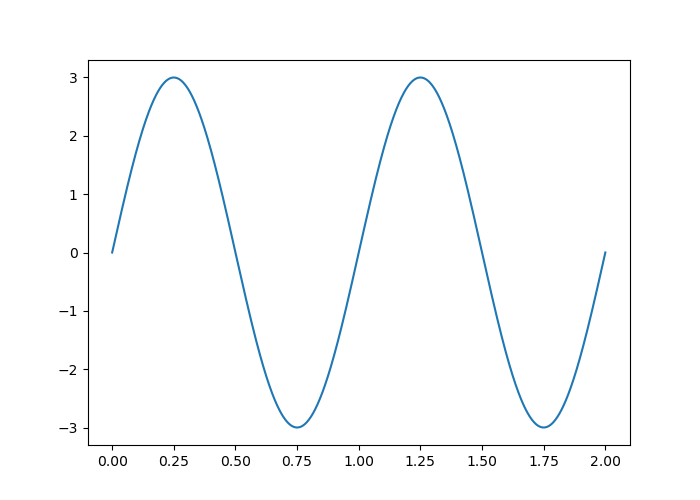

In [24]:
# Let's plot a sine function with a fixed amplitude and frequency
A = 3 # amplitude of 3
f = 1 # frequency of 4 Hz

def sine_function(t,frequency,amplitude):
    """
    This function takes in a collection of time points t, and
    outputs a sine function with a user-specified frequency and amplitude
    """
    return amplitude * np.sin(2 * np.pi * frequency * t) # this is the equation written in the cell above!

t_min, t_max = 0,2 # time range to plot. the graph will be plotted on the range [t_min,t_max]
t = np.linspace(t_min,t_max,1000) # generate 1000 equally spaced points on [t_min,t_max] to evaluate the sine function at
sint = sine_function(t,f,A) # evaluate our sine function at these time points

plt.figure(figsize=(7,5)) # make a pyplot figure
plt.plot(t,sint) # plot the sine function

To better understand how the amplitude $A$ and frequency $f$ affect the graph of the sine function, run the cell below and play with the frequency & amplitude sliders.

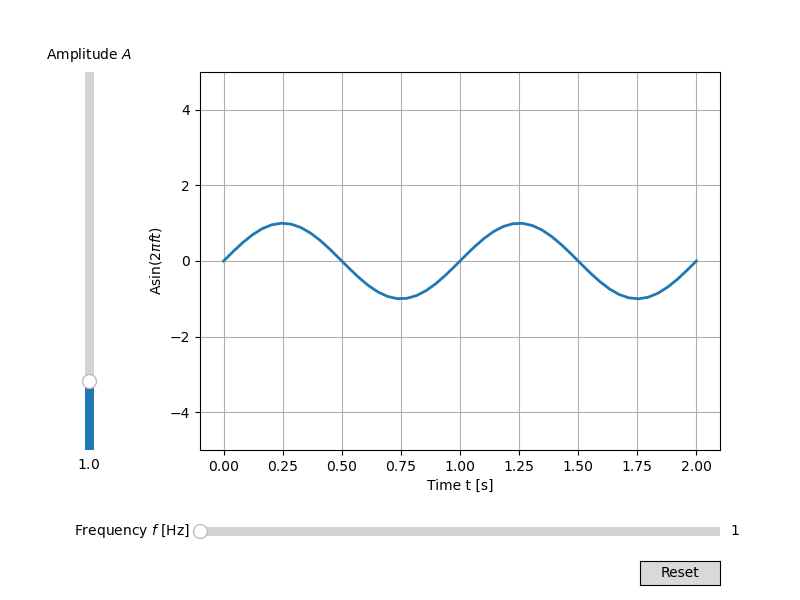

In [4]:
from helpers import interactive_sine
t_min, t_max = 0, 2
time_interval = np.linspace(t_min,t_max,1000) # 1000 equally spaced points between t_min and t_max
interactive_sine(time_interval=time_interval,
                initial_amplitude=1,
                initial_frequency=1,
                t_max=2,
                amp_max=5,
                freq_max=20)

Before we continue, make sure you understand what's going on here! Here are a few questions to get you thinking:
1. Focus on the time interval $0 < t < 1$ second. What is the relationship between the *frequency* $f$ and the behavior of the graph on this interval? We sometimes refer to frequency as "cycles per second" (Hz) -- does this name make sense?
2. How does the amplitude affect the curve? Does it have any impact on the answers to question 1?
3. **Coding**: If you increase the frequency to 20Hz, it becomes difficult to read the plot because so many oscillations are occurring per unit time. Try editing the code above so that it will plot the function on a *shorter* time interval.
4. **Coding**: The line `t = np.linspace(0,t_max,1000)` in the cell aboves defines the points where we evaluate the sine function -- in this case, 1000 equally spaced points between `t_min` and `t_max`. With the the frequency set to 20 Hz, try reducing the number of points to 100, 50, or 20. what happens to the shape of the curve? Is it still a faithful representation of the sine function?

## Hearing the math!

Now that we understand what sound *is* -- i.e. traveling waves of compression/rarefaction in air -- and we have a mathematical way to describe waves, we can unify these two and start to really understand sound! First, let's consider what a **speaker** does when it plays audio:

![speaker](media/speaker.gif)

In this gif, you can see the face of the speaker (the **diaphragm**) vibrating back and forth -- in this case, at 55 Hz. This means that if you made a graph of the horizontal position of the diaphragm as a function of time, it would look like a sine function with a frequency of 55 Hz. If we think about what the speaker's diaphragm is doing to the air molecules around it, we would see it creating pressure waves with the same frequency:

![waves-sine](media/soundInAir_withSine.gif)

So, what does this sine wave **sound** like? A single frequency sine wave corresponds to a "pure tone" -- in other words, just one note (think of playing a single key on a piano). If you play music, you probably tune your instrument to "A 440", which means a sound wave with a frequency of 440 Hz. The cell below this defines a python function called `play_tone`, which takes as arguments `frequency` (in Hz), and `duration` (in seconds). You don't need to understand all of the code - don't worry! We use the `ipytone` Python package to create an `Oscillator` object, and set its frequency to whatever you specify in the input argument. The `Oscillator` will play a pure sine tone for the `duration` that you specify. Let's give it a try!

In [22]:
def play_tone(frequency,duration=1):
    osc = ipytone.Oscillator(volume=-5)
    osc.frequency.value = frequency
    osc.connect(ipytone.destination)
    osc.start().stop(f"+{duration}")
    time.sleep(duration)
    osc.disconnect(ipytone.destination)
    osc.dispose()
    del osc

In [23]:
# Play an "A 440" - i.e. a 440 Hz sine wave -- for a duration of 1 second
play_tone(440,duration=1)

Now, try changing the frequency to something other that 440 and re-running the cell above. Here's some food for thought:
1. What happens to the sound if you *increase* the frequency from 440 Hz? What about if you *decrease* it? How does the frequency correspond to our intuitive ideas about "low pitched sound" and "high pitched sound"?
2. Try playing a tone that is an *integer multiple or fraction* of 440 -- for example $880 = 2 \times 440$ or $210 = 440/2$. How does it sound relative to the 440 Hz tone? In music theory, we call these multiples **octaves**. An 880 Hz note is the "same note" as 440 Hz -- i.e. an A -- but shifted up by an octave

## Stacking tones together -- chords!

So far, we've only been considering single-frequency sine waves -- playing one note on a keyboard. As you know, we can also play multiple keys at the same time to make **chords**. To represent a chord mathematically, all we have to do is **sum the sine waves together**! For example, we can represent a chord with two frequencies $f_1$ and $f_2$ as:

$$ f_\mathrm{chord}(t) = A_1\sin(2\pi f_1 t) + A_2\sin(2\pi f_2 t) $$

Let's have a look at the graph of a two-note chord

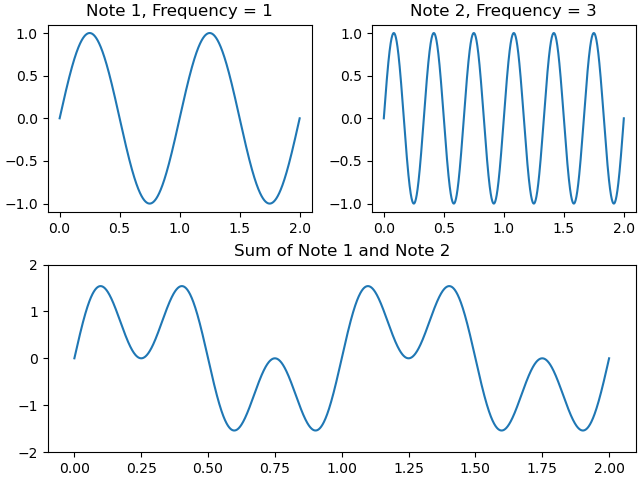

Output()

In [3]:
t = np.linspace(0,2,2000)
freq_1 = 1
freq_2 = 3
chord_1 = np.sin(2 * np.pi * freq_1 * t)
chord_2 = np.sin(2 * np.pi * freq_2 * t)

fig = plt.figure(layout='constrained')
gs = GridSpec(2, 2, figure=fig, height_ratios=[1,1])

ax1 = fig.add_subplot(gs[0,0])
l1, = ax1.plot(t,chord_1)
ax1.set_title(f"Note 1, Frequency = {freq_1}")

ax2 = fig.add_subplot(gs[0,1])
l2, = ax2.plot(t,chord_2)
ax2.set_title(f"Note 2, Frequency = {freq_2}")

ax3 = fig.add_subplot(gs[1,:])
l3, = ax3.plot(t,chord_1+chord_2)
ax3.set_title("Sum of Note 1 and Note 2")
ax3.set_ylim([-2,2])

plt.show()

def change_freqs(f1,f2):
    chord_1 = np.sin(2 * np.pi * f1 * t)
    chord_2 = np.sin(2 * np.pi * f2 * t)
    l1.set_ydata(chord_1)
    ax1.set_title(f"Note 1, Frequency = {f1}")
    l2.set_ydata(chord_2)
    ax2.set_title(f"Note 2, Frequency = {f2}")
    l3.set_ydata(chord_1+chord_2)
    plt.draw()

s1 = ipywidgets.IntSlider(value=freq_1,min=1,max=20,step=1,description="Frequency 1",disabled=False)
s2 = ipywidgets.IntSlider(value=freq_2,min=0,max=20,step=1,description="Frequency 2",disabled=False)
act = ipywidgets.interactive(change_freqs,f1=s1,f2=s2)
display(ipywidgets.HBox(act.children[:-1]))
display(act.children[-1])#Show the output

There's a lot of interesting stuff going on here! Play around with the sliders above, and think about these questions:
1. Using different settings for frequency 1 and frequency 2, study the waveform closely. Is it also a periodic signal?
2. If you fix frequency 1 to be 1 Hz and vary frequency 2, what is the period of the resulting waveform?
3. If you fix frequency 1 at 1 Hz and make frequency 2 large (20 Hz, for example), do you notice any interesting structure in the output waveform?

Now, let's 

In [64]:
psynth = ipytone.PolySynth(voice=ipytone.Synth, volume=-8).to_destination()

In [66]:
psynth.trigger_attack_release(["C3", "C4", "E4", "G4"], 1)

PolySynth()

In [21]:
psynth.release_all()

PolySynth()

In [67]:
notes = [440,554.37,659.25,880]
oscillators = []
vbox_f = []
vbox_typ = []
vbox_vol = []
vbox_stop = []
def toggle(change):
    index = vbox_stop.index(change.owner)
    if change['new']:
        oscillators[index].start()
    else:
        oscillators[index].stop()
for i,note in enumerate(notes):
    oscillators.append(ipytone.Oscillator(volume=-5))
    oscillators[i].connect(ipytone.destination)
    vbox_f.append(ipywidgets.FloatSlider(value=note,min=100,max=1000,step=0.01,description=f"Frequency {i+1}"))
    vbox_typ.append(ipywidgets.Dropdown(options=['sine', 'square', 'sawtooth', 'triangle'],value='sine'))
    vbox_stop.append(ipywidgets.ToggleButton(value=False,description=f"Start/Stop {i+1}"))
    vbox_vol.append(ipywidgets.FloatSlider(value=-5,min=-15,max=5,step=0.1,description=f"Volume {i+1}"))
for i in range(len(notes)):
    ipywidgets.jslink((vbox_f[i], 'value'), (oscillators[i].frequency, 'value'))
    ipywidgets.link((vbox_typ[i], 'value'), (oscillators[i], 'type'))
    vbox_stop[i].observe(toggle,names='value')
    ipywidgets.jslink((vbox_vol[i], 'value'), (oscillators[i].volume, 'value'))

resetAll = ipywidgets.Button(description=f"Reset Notes")
def reset_all(click):
    for i in range(len(notes)):
        oscillators[i].frequency.value = notes[i]
        oscillators[i].volume.value = -5
resetAll.on_click(reset_all)

stopAll = ipywidgets.ToggleButton(value=False,description=f"Stop Everything")
def stop_all(change):
    if change['new']:
        for osc in oscillators:
            osc.stop()
            osc.disconnect(ipytone.destination)
            osc.dispose()
            del osc
stopAll.observe(stop_all, names='value')

ipywidgets.VBox([ipywidgets.HBox([ipywidgets.VBox(vbox_f),ipywidgets.VBox(vbox_typ),ipywidgets.VBox(vbox_stop),ipywidgets.VBox(vbox_vol)]),
                 ipywidgets.HBox([resetAll,stopAll])])

In [7]:
osc = ipytone.Oscillator(volume=-5)
osc.connect(ipytone.destination)

freq_slider = ipywidgets.FloatSlider(
    value=440,
    min=100,
    max=1000,
    step=1,
)

type_dropdown = ipywidgets.Dropdown(
    options=['sine', 'square', 'sawtooth', 'triangle'],
    value='sine',
)

toggle_play_button = ipywidgets.ToggleButton(
    value=False,
    description="Start/Stop"
)

ipywidgets.jslink((freq_slider, 'value'), (osc.frequency, 'value'))
ipywidgets.link((type_dropdown, 'value'), (osc, 'type'))

def start_stop_osc(change):
    if change['new']:
        osc.start()
    else:
        osc.stop()

toggle_play_button.observe(start_stop_osc, names='value')

ipywidgets.VBox([freq_slider, type_dropdown, toggle_play_button])

In [1]:
def minmax_scale(x):
    xmin = np.min(x)
    xmax = np.max(x)
    x = (x-xmin)/(xmax-xmin) # scale to [0,1]
    x = x-0.5 # scale to [-0.5,0.5]
    x = 2*x # scale to [-1,1]
    return x

# Single frequency with widgets

In [10]:
osc = ipytone.Oscillator(volume=-5)

In [11]:
osc.connect(ipytone.destination)

Oscillator()

In [12]:
osc.start()

Oscillator()

In [13]:
osc.stop()

Oscillator()

In [14]:
osc.disconnect(ipytone.destination)

Oscillator()

In [11]:
osc.dispose()

Oscillator()

In [12]:
import time

def linear_ramp_to(value, ramp_time):
    n = 100
    time_step = ramp_time / n
    freq_step = (value - osc.frequency.value) / n
    for i in range(n):
        time.sleep(time_step)
        osc.frequency.value += freq_step

In [13]:
osc.frequency.value = 440

osc.start()
linear_ramp_to(800, 3)
osc.stop()


Oscillator()

In [15]:
osc.frequency.value = 440
osc.start().stop("+3")
osc.frequency.linear_ramp_to(800, 3)
osc.frequency.set_value_at_time(440, "+3")

Signal(value=440.0, units='frequency')

In [17]:
freq_slider = ipywidgets.FloatSlider(
    value=440,
    min=100,
    max=1000,
    step=1,
)

type_dropdown = ipywidgets.Dropdown(
    options=['sine', 'square', 'sawtooth', 'triangle'],
    value='sine',
)

toggle_play_button = ipywidgets.ToggleButton(
    value=False,
    description="Start/Stop"
)

ipywidgets.jslink((freq_slider, 'value'), (osc.frequency, 'value'))
ipywidgets.link((type_dropdown, 'value'), (osc, 'type'))

def start_stop_osc(change):
    if change['new']:
        osc.start()
    else:
        osc.stop()

toggle_play_button.observe(start_stop_osc, names='value')

ipywidgets.VBox([freq_slider, type_dropdown, toggle_play_button])


# Custom Notes

In [82]:
sample_rate = 44100
duration = 5
frequency = 440

size = int(sample_rate * duration)

factor = frequency * np.pi * 2 / sample_rate
waveform = np.sin(np.arange(size) * factor)

In [84]:
down_rate = 44100/sample_rate

buff = ipytone.AudioBuffer(url_or_array=waveform)
player = ipytone.Player(buff).to_destination()

player.playback_rate = 1/down_rate
player.start().stop("+2")

Player()

In [85]:
buff.dispose()
player.dispose()

Player(disposed=True)

In [125]:
rate,data = wavfile.read('gould.wav')
num_secs = 3.88
samps = int(rate*num_secs)
offset = 48000
audio = data[offset:offset+samps]

downsample = 4
subsample = audio[::downsample][:,0]
new_rate = rate//downsample

down_rate = 44100/new_rate
subsample = minmax_scale(subsample)
buff = ipytone.AudioBuffer(url_or_array=subsample.astype(np.float32))
player = ipytone.Player(buff).to_destination()
player.playback_rate = 1/down_rate
player.start().stop("+4")

Player()

In [101]:
buff.dispose()
player.dispose()

Player(disposed=True)

In [111]:
new_rate

171098.0